# Disease Predictor using Data Mining

### Dataset link:
https://www.kaggle.com/itachi9604/disease-symptom-description-dataset?select=dataset.csv

### Tools and Techniques
*  Environment used is PyCharm
*  Classifier Algorithm used is Support Vector Classifer
*  Frontend framework is pyqt5
*  Backend Languge used is Python 3.6
*  Used the pandas framework for data manupulation and cleaning

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

**Read the dataset**

In [2]:
df = pd.read_csv('data/disease_dataset.csv')
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dataset info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4923 non-null   object
 1   Symptom_1   4923 non-null   object
 2   Symptom_2   4923 non-null   object
 3   Symptom_3   4923 non-null   object
 4   Symptom_4   4575 non-null   object
 5   Symptom_5   3716 non-null   object
 6   Symptom_6   2936 non-null   object
 7   Symptom_7   2270 non-null   object
 8   Symptom_8   1946 non-null   object
 9   Symptom_9   1693 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.4+ KB


**Dataset characteristics**

In [4]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4923,4923,4923,4923,4575,3716,2936,2270,1946,1693,1512,1194,744,504,306,240,192,72
unique,42,36,50,56,52,40,34,28,23,23,21,18,11,8,4,3,3,1
top,Hypertension,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,stomach_bleeding,chest_pain,chest_pain,loss_of_smell,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Check for null and NaN values**

In [5]:
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1207
Symptom_6     1987
Symptom_7     2653
Symptom_8     2977
Symptom_9     3230
Symptom_10    3411
Symptom_11    3729
Symptom_12    4179
Symptom_13    4419
Symptom_14    4617
Symptom_15    4683
Symptom_16    4731
Symptom_17    4851
dtype: int64

**Remove the trailing space from the symptom columns**

In [6]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Total Disease are**

In [7]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'covid'],
      dtype=object)

**Fill the NaN values with zero**

In [8]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Encode symptoms in the data with the symptom rank**

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column].astype(str))

**Plot the dataset attribute with each other**

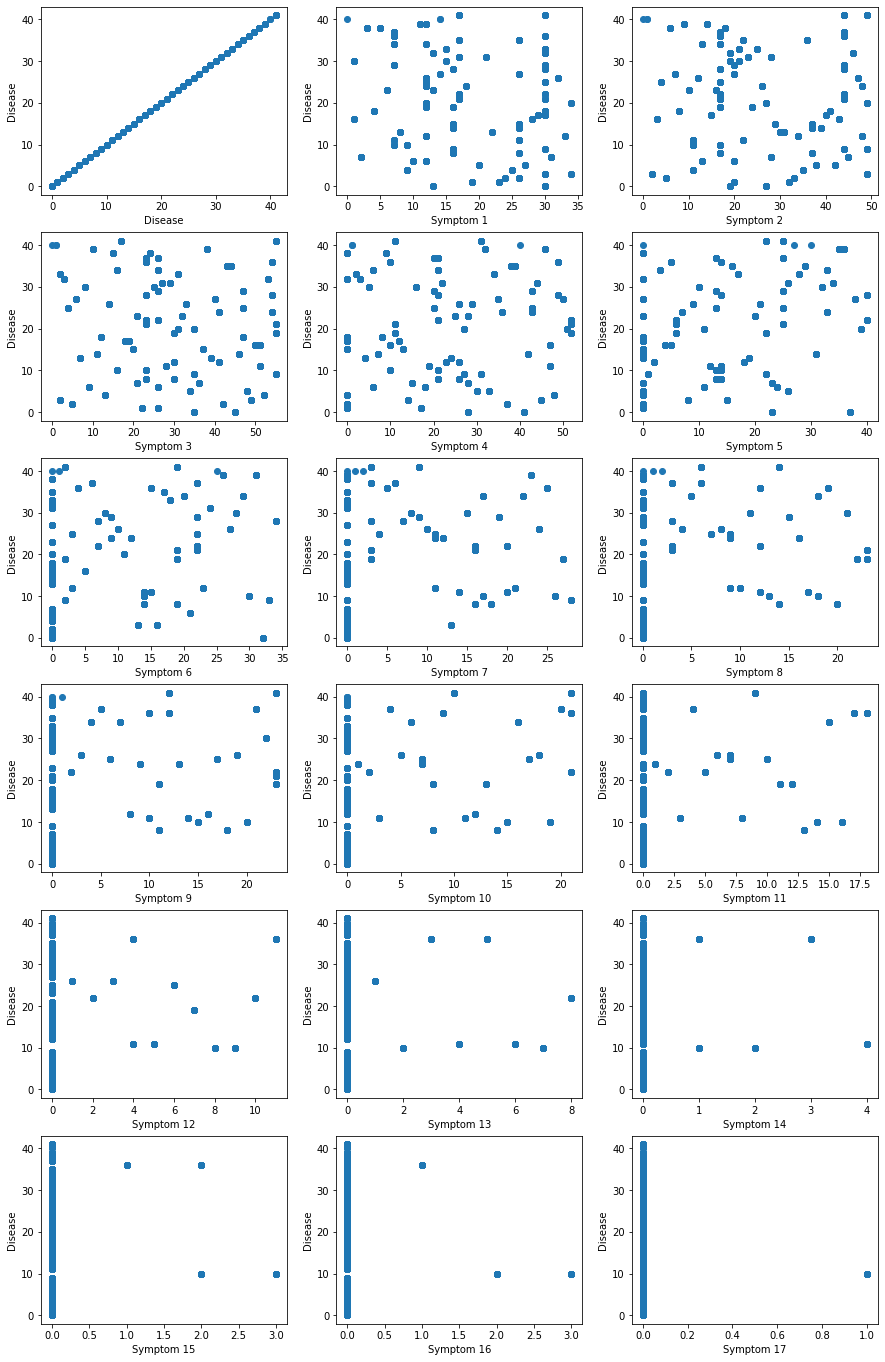

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,45))

plot_count = 1
for feature in list(df.columns):
    plt.subplot(11,3,plot_count)
    plt.scatter(df[feature], df['Disease'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Disease')
    plot_count+=1
    
plt.show()

**Check if entire columns have zero values so we can drop those values**

In [11]:
(df[cols] == 0).all()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

**Select the features as symptoms column and label as Disease column**

In [12]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

**Split the data, labels with shuffle**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4184, 17) (739, 17) (4184,) (739,)


**Initialize and train a Support vector classifier**

In [14]:
model = SVC()
model.fit(x_train, y_train)

SVC()

**Throw predictions**

In [15]:
preds = model.predict(x_test)

**Plot the confusion matrix for 25 diseases and calculate f1, accuracy**

F1-score% = 92.42967792825483 | Accuracy% = 94.72259810554804


<AxesSubplot:>

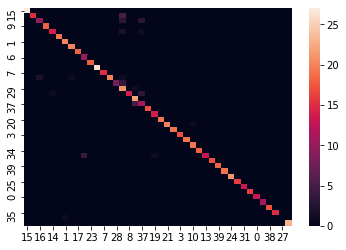

In [16]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

**Now by using Naive Bayes classfier**

F1-score% = 84.45298953653445 | Accuracy% = 85.65629228687416


<AxesSubplot:>

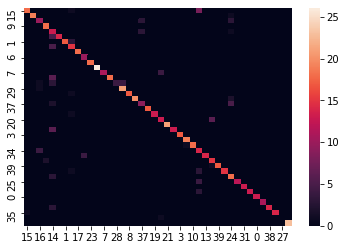

In [19]:
from  sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
preds = model.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

# Testing 

**Reading dataset of disease**

In [1]:
# read the dataset
import pandas as pd
import numpy as np
# let assume the patient have the following symptoms
df = pd.read_csv("data/disease_dataset.csv")

**remove all the spaces**

In [2]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

**Input and compare**

In [3]:
# Here is the actual implementation

['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'stomach_pain', 'acidity', 'vomiting', 'indigestion', 'muscle_wasting', 'patches_in_throat', 'fatigue', 'weight_loss', 'sunken_eyes', 'cough', 'headache', 'chest_pain', 'back_pain', 'weakness_in_limbs', 'chills', 'joint_pain', 'yellowish_skin', 'constipation', 'pain_during_bowel_movements', 'breathlessness', 'cramps', 'weight_gain', 'mood_swings', 'neck_pain', 'muscle_weakness', 'stiff_neck', 'pus_filled_pimples', 'burning_micturition', 'bladder_discomfort', 'high_fever', 'Tiredness'] Tiredness\


                                      Disease            Symptom_1  \
0                            Fungal infection              itching   
1                            Fungal infection            skin_rash   
2                            Fungal infection              itching   
3                            Fungal infection              itching   
4                            Fungal infection              itching   
5                            Fungal infection            skin_rash   
6                            Fungal infection              itching   
7                            Fungal infection              itching   
8                            Fungal infection              itching   
9                            Fungal infection              itching   
10                                    Allergy  continuous_sneezing   
11                                    Allergy            shivering   
12                                    Allergy  continuous_sneezing   
13                  

['skin_rash', 'nodal_skin_eruptions', 'shivering', 'chills', 'acidity', 'ulcers_on_tongue', 'vomiting', 'yellowish_skin', 'stomach_pain', 'loss_of_appetite', 'indigestion', 'patches_in_throat', 'high_fever', 'weight_loss', 'restlessness', 'sunken_eyes', 'dehydration', 'cough', 'chest_pain', 'dizziness', 'headache', 'weakness_in_limbs', 'neck_pain', 'weakness_of_one_body_side', 'fatigue', 'joint_pain', 'lethargy', 'nausea', 'abdominal_pain', 'pain_during_bowel_movements', 'pain_in_anal_region', 'breathlessness', 'sweating', 'cramps', 'bruising', 'weight_gain', 'cold_hands_and_feets', 'mood_swings', 'anxiety', 'knee_pain', 'stiff_neck', 'swelling_joints', 'pus_filled_pimples', 'blackheads', 'bladder_discomfort', 'foul_smell_of urine', 'skin_peeling', 'blister', 'Tiredness', 'Dry-Cough'] Dry-Cough


     Disease  Symptom_1  Symptom_2                Symptom_3    Symptom_4  \
4922   covid  Tiredness  Dry-Cough  Difficulty-in-Breathing  sore_throat   

     Symptom_5         Symptom_6   Symptom_7 Symptom_8 Symptom_9 Symptom_10  \
4922     pains  Nasal_Congestion  Runny_Nose  Diarrhea       NaN        NaN   

     Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15 Symptom_16  \
4922        NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_17  
4922        NaN  
covid


**Predicted Disease**

In [4]:
print(out['Disease'].unique()[0])

covid
